In [1]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('../data/spambase_train.csv', delimiter=',')
data_test=np.genfromtxt('../data/spambase_test.csv', delimiter=',')
X=data[:,0:-1]
y=data[:,-1]
X_test=data_test[:,0:-1]
y_test=data_test[:,-1]

In [3]:
a=['../data/spambase_train.csv','../data/bank_train.csv',
   '../data/adult_train.csv','../data/annealing_train.csv',
   '../data/audiology-std_train.csv','../data/blood_train.csv',
   '../data/breast-cancer-wisc-diag_train.csv','../data/breast-cancer-wisc_train.csv',
   '../data/congressional-voting_train.csv','../data/credit-approval_train.csv',
   '../data/cylinder-bands_train.csv','../data/echocardiogram.csv',
   '../data/vertebral-column-2clases_train.csv','../data/statlog-shuttle_train.csv',
   '../data/spect_train.csv','../data/spectf_train_train.csv',
    '../data/ringnorm_train.csv','../data/twonorm_train.csv']

at=['../data/spambase_test.csv','../data/bank_test.csv','../data/adult_test.csv',
    '../data/annealing_test.csv','../data/audiology-std_test.csv','../data/blood_test.csv',
    '../data/breast-cancer-wisc-diag_test.csv','../data/breast-cancer-wisc_test.csv',
    '../data/congressional-voting_test.csv','../data/credit-approval_test.csv',
    '../data/cylinder-bands_test.csv','../data/echocardiogram_test.csv',
    '../data/vertebral-column-2clases_test.csv','../data/statlog-shuttle_test.csv',
    '../data/spect_test.csv','../data/spectf_train_test.csv',
    '../data/ringnorm_test.csv','../data/twonorm_test.csv']

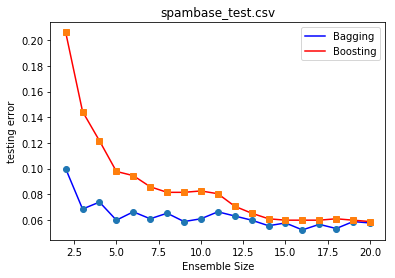

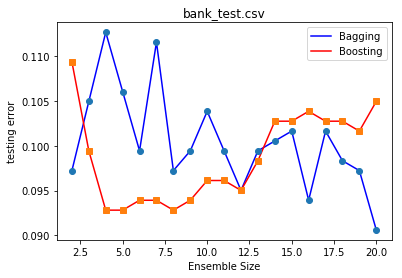

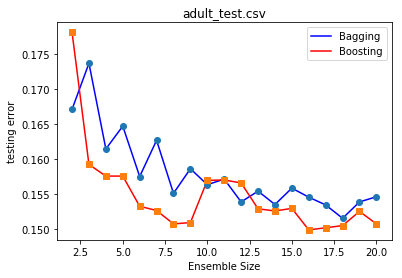

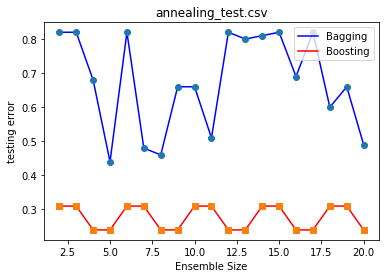

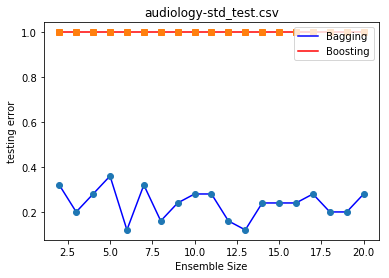

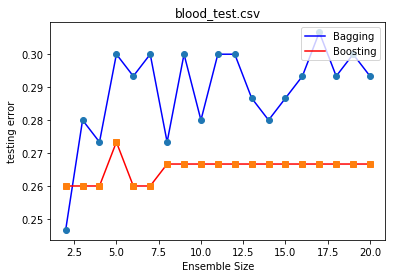

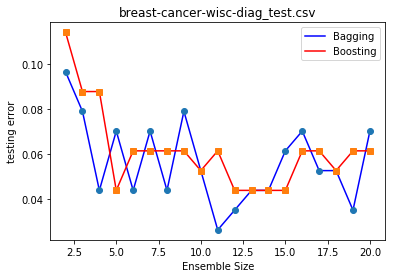

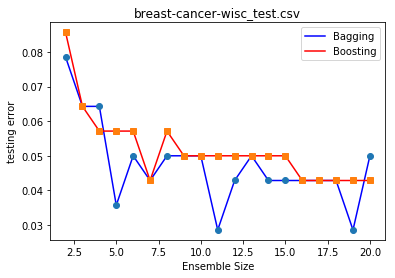

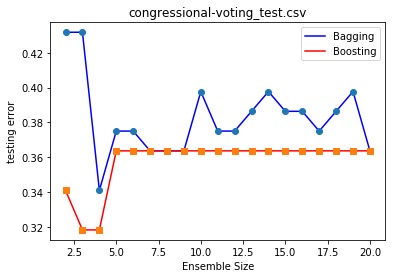

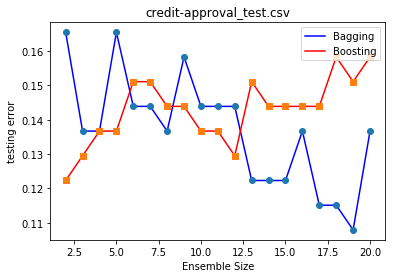

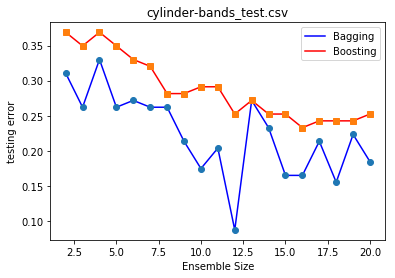

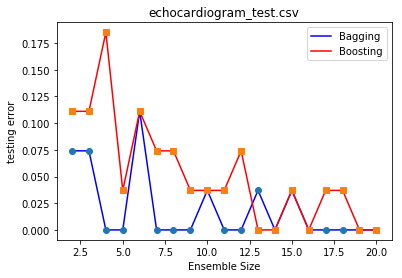

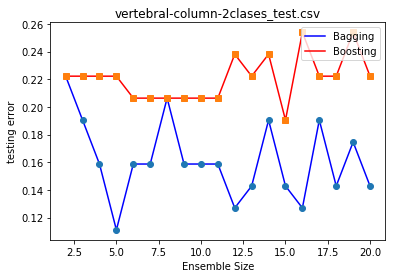

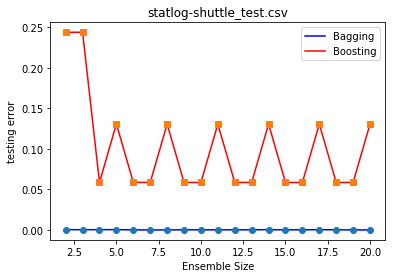

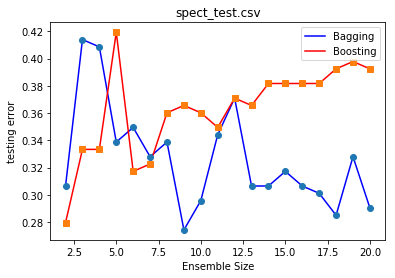

In [4]:

n=21       #number of estimators 

for i in range(0,15):
    test_errors_bagg = list()
    test_errors_boost = list()
    data=np.genfromtxt(a[i], delimiter=',')
    data_test=np.genfromtxt(at[i], delimiter=',')
    X=data[:,0:-1]
    y=data[:,-1]
    X_test=data_test[:,0:-1]
    y_test=data_test[:,-1]
    for k in range(2,n):
        bagging = BaggingClassifier(n_estimators=k)
        bagging.fit(X,y)
        test_errors_bagg.append(1-bagging.score(X_test, y_test))
    
        adaboost=AdaBoostClassifier(n_estimators=k)
        adaboost.fit(X,y)
        test_errors_boost.append(1-adaboost.score(X_test, y_test))
    plt.title(at[i][8:])
    plt.plot(np.arange(2, n,1),test_errors_bagg,label='Bagging',c='b')
    plt.plot(np.arange(2, n,1),test_errors_boost,label= 'Boosting',c='r')
    plt.plot(np.arange(2, n,1),test_errors_bagg,'o')
    plt.plot(np.arange(2, n,1),test_errors_boost,'s')
    plt.xlabel('Ensemble Size')
    plt.ylabel('testing error')
    plt.legend(loc='upper right')
    plt.show()
    

